<center><img src='https://netacad.centralesupelec.fr/img/cs.jpg' width=200></center>

<h6><center>Introduction to Machine Learning</center></h6>

<h1>
<hr style=" border:none; height:3px;">
<center>Tutorial 1: Data preprocessing (synthetic data)</center>
<hr style=" border:none; height:3px;">
</h1>

__Teachers__: Myriam Tami, Gianluca Quercini, Yassine Ouali

# Introduction

In this tutorial we're going to experiment with synthetic data and learn basic data preprocessing operations with *Scikit-learn*.

<div class="alert alert-block alert-info">

For the most part, the Python code is already written for you. You're invited to **read the code and the comments** to learn how to practice machine learning with *Scikit-learn*. Your instructor will also explain the code.

</div>



# Setup

We import the modules that are commonly used in combination with Scikit-learn.

<div class="alert alert-block alert-warning">
In order to run this notebook, you'll need to install <b>Python 3.5 or later</b>, as well as <b>Scikit-learn 0.20 or later</b>.
</div>

In [ ]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Numpy arrays are used to store training and test data.
import numpy as np

# Pandas is used to manipulate tabular data.
import pandas as pd

# Matplotlib is used to plot graphs.
%matplotlib inline 
import matplotlib as mpl
import matplotlib.pyplot as plt
# Style options for plots.
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Ignore useless warnings (see SciPy issue #5998).
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

# Convenience function to create display a progress bar.
# Source : https://stackoverflow.com/questions/3173320/text-progress-bar-in-the-console
def print_progress_bar (iteration, total, prefix = '', suffix = '', decimals = 1, length = 100, fill = '█', printEnd = "\r"):
    """
    Call in a loop to create terminal progress bar
    @params:
        iteration   - Required  : current iteration (Int)
        total       - Required  : total iterations (Int)
        prefix      - Optional  : prefix string (Str)
        suffix      - Optional  : suffix string (Str)
        decimals    - Optional  : positive number of decimals in percent complete (Int)
        length      - Optional  : character length of bar (Int)
        fill        - Optional  : bar fill character (Str)
        printEnd    - Optional  : end character (e.g. "\r", "\r\n") (Str)
    """
    percent = ("{0:." + str(decimals) + "f}").format(100 * (iteration / float(total)))
    filledLength = int(length * iteration // total)
    bar = fill * filledLength + '-' * (length - filledLength)
    print(f'\r{prefix} |{bar}| {percent}% {suffix}', end = printEnd)
    # Print New Line on Complete
    if iteration == total: 
        print()
 
# Saves a figure to a file
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join("./figs", fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Experimenting with synthetic data

Scikit-learn provides the function [*sklearn.datasets.make_regression()*](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_regression.html) to generate synthetic data for regression problems.

In the following cell we generate a dataset with **1000 instances** and **1 feature**. The function returns:

* a (1000 $\times$ 1) matrix $X$, with the values of the feature (**independent variable**) for the 1000 instances.

* a (1000 $\times$ 1) vector $y$, with the values of the **dependent variable** (or, **target variable**), the one to predict.

<div class="alert alert-block alert-info">
The value of the parameter <i>random_state</i> is a random number generator seed. When its value is <i>None</i>, each time we run the cell we obtain a different dataset, otherwise we always obtain the same dataset.
</div>

<div class="alert alert-block alert-info">
The matrix $X$ and the vector $y$ are represented as <b>Numpy arrays</b>.
</div>

Text(0.5, 1.0, 'Generated dataset')

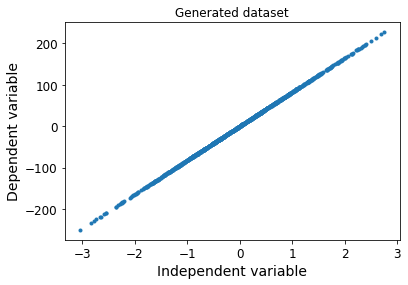

In [ ]:
from sklearn.datasets import make_regression

X, y = make_regression(
    n_samples=1000, #number of instances.
    n_features=1,   #number of features.
    random_state=0  #generate the same dataset at each run.
)

# Plot the dataset with Matplotlib
plt.plot(X, y,'.',label='Dataset')
plt.xlabel('Independent variable')
plt.ylabel('Dependent variable')
plt.title('Generated dataset')

The instances form a perfect line, which doesn't make the linear regression problem very interesting. We can add some **noise** to the dataset with the *noise* parameter, as in the following cell.

<div class="alert alert-block alert-info">
The value of the parameter <i>noise</i> is the <b>standard deviation</b> of the Gaussian noise added to the instances (the <b>mean</b> being 0).
</div>

Text(0.5, 1.0, 'Generated dataset')

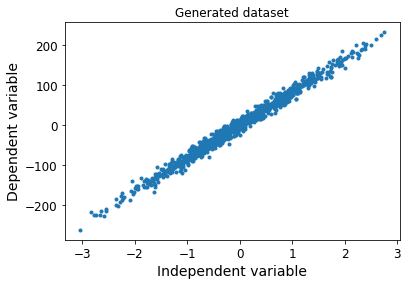

In [ ]:
X, y = make_regression(
    n_samples=1000, #number of instances.
    n_features=1,   #number of features.
    noise = 10,     #standard deviation of the gaussian noise applied to the output.
    random_state=0  #generate the same dataset at each run.
)

# Plot the dataset with Matplotlib
plt.plot(X, y,'.',label='Dataset')
plt.xlabel('Independent variable');
plt.ylabel('Dependent variable')
plt.title('Generated dataset')

In order to train a linear regressor on the generated dataset, we need to split the dataset into a **training set** and a **test set**. 
Scikit-learn provides the function [*sklearn.model_selection.train_test_split*](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) that takes in the following parameters:

* The matrix $X$ with the independent variables.
* The vector $y$ with the dependent variable.
* The size of the test set (percentage of the size of the complete dataset).
* A random number generator seed (if we don't specify any, each time we run the cell we get different training/test sets).

The function returns:

* The matrix $X_{train}$ with the **independent variables** of the **training instances**.
* The matrix $X_{test}$ with the **independent variables** of the **test instances**.
* The vector $y_{train}$ with the **dependent variable** of the **training instances**.
* The vector $y_{test}$ with the **dependent variable** of the **test instances**.

<div class="alert alert-block alert-info">
As per convention, we keep 80% of the instances for training and sample out 20% of instances for testing.
</div>

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Scikit-learn provides the function [*sklearn.linear_model.SGDRegressor*](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html) to solve a linear regression problem by using the **gradient descent** algorithm.

<div class="alert alert-block alert-info">
The plot that you obtain after running the following cell shows the model (in red) that the linear regressor learns from the training data. In this case, the model is a straight line.
</div>


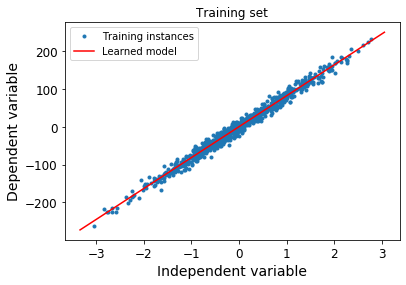

In [ ]:
from sklearn.linear_model import SGDRegressor

# We create an instance of the linear regressor.
lin_reg = SGDRegressor()

# The function fit is used to train the linear regressor on the training data.
# The result is a line with a given intercept and slope.
lin_reg.fit(X_train, y_train)

# The intercept and the slope of the line learned on the training set.
intercept = lin_reg.intercept_[0]
slope = lin_reg.coef_[0]

# Plot the instances of the training set.
plt.plot(X_train, y_train,'.', label='Training instances')

# We plot the line learned from the training set.
axes = plt.gca()
x_vals = np.array(axes.get_xlim())
y_vals = intercept + slope * x_vals
plt.plot(x_vals, y_vals, '-r', label="Learned model")

# We write a title and the labels on the axes.
plt.xlabel('Independent variable');
plt.ylabel('Dependent variable')
plt.title('Training set')
plt.legend()

We can use the learned model to make predictions on the test instances. Since we know the true target values of the test instances, we can also measure the **prediction error**.

<div class="alert alert-block alert-info">

The prediction error is measured with the <b>root mean square error (RMSE)</b>

</div>

The prediction error (RMSE) is 9.544164588290558


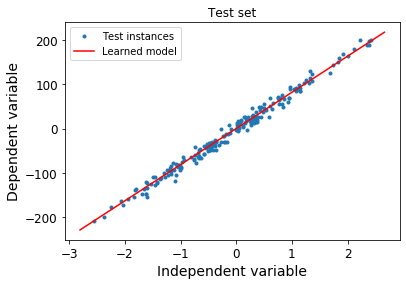

In [ ]:
from sklearn.metrics import mean_squared_error

# We use the function predict to make predictions on the test instances. 
predictions = lin_reg.predict(X_test)
# We compute the mean squared error, by comparing 
# the predictions with the actual target values
mse = mean_squared_error(y_test, predictions)

# We print the root mean square error.
print("The prediction error (RMSE) is {}".format(np.sqrt(mse)))

# Plot the instances of the test set.
plt.plot(X_test, y_test,'.', label='Test instances')

# We plot the line learned from the training set.
axes = plt.gca()
x_vals = np.array(axes.get_xlim())
y_vals = intercept + slope * x_vals
plt.plot(x_vals, y_vals, '-r', label="Learned model")

plt.xlabel('Independent variable');
plt.ylabel('Dependent variable')
plt.title('Test set')
plt.legend()


## Effect of scale

We want to analyze the effect of the **scale of the feature values** on the gradient descent algorithm.
For this purpose: 

1. We generate a dataset for linear regression with a high number of features (up to 100,000);

2. We scale the values of these features so that they all have very different scales.

3. We compute the time taken for training a linear regressor for a varying number of features. 

<div class="alert alert-block alert-success">
<b>Question 1.</b> Write the code to generate a dataset for linear regression with 1,000 instances and 100,000 features. 
</div>

<div class="alert alert-block alert-success">
<b>Solution.</b> The code is given below.
</div>

In [ ]:
n_features = 100000
n_samples = 1000
X, y = make_regression(n_samples=n_samples, n_features=n_features, noise=10, random_state=2)

In the following cell, we define the function *plot_mean_stdev* to plot the **mean** and the **standard deviation** of each feature. We call the function on the generated dataset.

<div class="alert alert-block alert-success">
<b>Question 2.</b> What can you say about the scale of the features?
</div>

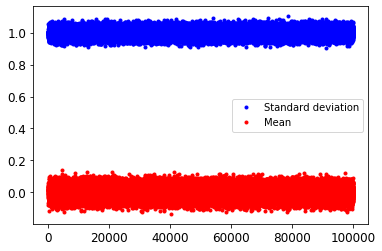

In [ ]:
def plot_mean_stdev(X, n_features):
    plt.plot([i for i in range(n_features)], np.std(X, axis=0), '.b', label="Standard deviation") 
    plt.plot([i for i in range(n_features)], np.mean(X, axis=0), '.r', label="Mean") 
    plt.legend()
    
plot_mean_stdev(X, n_features)

<div class="alert alert-block alert-success">
<b>Solution.</b> The mean and the standard deviation of all features are near 0 and 1 respectively. This means that 
the features of the generated dataset have the same scale.
</div>

We **rescale the features** so that they have values with **very different scales**.

In [ ]:
import random

# For each feature, we rescale their values so that their minimum value
# is between -100000 and 10000 and their maximum value is between 20000, 100000
for i in range(n_features):
    X[:, i] = np.interp(X[:, i], (X[:, i].min(), X[:, i].max()), \
                        (random.randint(-100000, 10000), random.randint(20000, 100000)))

In the following cell, we **train a linear regressor** with **varying number of features** and we record the training times.
As you can see, training slows down considerably while we increase the number of features. 

In [ ]:
import time

# We save here the training time for varying number of features.
training_times_unscaled = []

for i in range(1, 6):
    print("Training with {} features".format(10**i))
    X_train, X_test, y_train, y_test = train_test_split(X[:, :10**i], y, test_size=0.2, random_state=42)
    lin_reg = SGDRegressor()
    start_time = time.time()
    # We train the linear regressor
    lin_reg.fit(X_train, y_train)
    training_time = time.time() - start_time
    training_times_unscaled.append(training_time)
    print("Training time --- {} seconds ---\n".format(training_time))

Training with 10 features
Training time --- 0.007845878601074219 seconds ---

Training with 100 features
Training time --- 0.02328181266784668 seconds ---

Training with 1000 features
Training time --- 0.10750985145568848 seconds ---

Training with 10000 features
Training time --- 1.1652698516845703 seconds ---

Training with 100000 features
Training time --- 16.779515981674194 seconds ---



In the following cell, we **standardize** the features in the training set, so that they all have 0 mean and unit standard deviation, **before** training the linear regressor.


To standardize the features, we use the class [*sklearn.preprocessing.StandardScaler*](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)

***StandardScaler* is used on variables that have a Gaussian distribution.**

<div class="alert alert-block alert-info">
In the following cell, the training time also accounts for the time of scaling the features.
</div>

Training with 10 features
Training time --- 0.005391836166381836 seconds ---

Training with 100 features
Training time --- 0.022834062576293945 seconds ---

Training with 1000 features
Training time --- 0.7920260429382324 seconds ---

Training with 10000 features
Training time --- 0.2912137508392334 seconds ---

Training with 100000 features
Training time --- 6.52357292175293 seconds ---



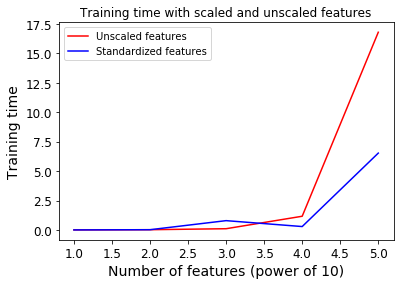

In [ ]:
from sklearn.preprocessing import StandardScaler

# We save here the training time for varying number of features.
training_times_standardized = []

for i in range(1, 6):
    print("Training with {} features".format(10**i))
    X_train, X_test, y_train, y_test = train_test_split(X[:, :10**i], y, test_size=0.2, random_state=42)
    lin_reg = SGDRegressor()
    
    start_time = time.time()
    
    # We create an instance of the class StandardScaler
    scaler = StandardScaler()
    # We scale the training instances.
    X_train = scaler.fit_transform(X_train)
    
    # We train the linear regressor
    lin_reg.fit(X_train, y_train)
    training_time = time.time() - start_time
    training_times_standardized.append(training_time)
    print("Training time --- {} seconds ---\n".format(training_time))

# We plot the training times with unscaled and standardized features.
plt.plot([1, 2, 3, 4, 5], training_times_unscaled, '-r', label="Unscaled features")
plt.plot([1, 2, 3, 4, 5], training_times_standardized, '-b', label="Standardized features")

plt.xlabel('Number of features (power of 10)');
plt.ylabel('Training time')
plt.title('Training time with scaled and unscaled features')
plt.legend()

When the variable does not have a Gaussian distribution, an alternative to *StandardScaler* is *MinMaxScaler* that transforms the data so that they fall in the interval $[0, 1]$; if you want the data to fall in a different interval (e.g., [-1, 1]) you can use the option *feature_range* of *MinMaxScaler*.


<div class="alert alert-block alert-success">
<b>Question 3.</b> Write the code to analyze the training time (as we did in the previous cell) when using <b>min-max scaling</b> (set the interval to [-1, 1]) with a varying number of features. Use the class 
<a href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html" target="_blank"><i>sklearn.preprocessing.MinMaxScaler</i></a>. Comment on the result.
</div>



<div class="alert alert-block alert-success">
<b>Solution.</b> The code is given below
</div>

Training with 10 features
Training time --- 0.010566949844360352 seconds ---

Training with 100 features
Training time --- 0.024327993392944336 seconds ---

Training with 1000 features


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


Training time --- 2.0588700771331787 seconds ---

Training with 10000 features
Training time --- 0.4546620845794678 seconds ---

Training with 100000 features
Training time --- 2.617861032485962 seconds ---



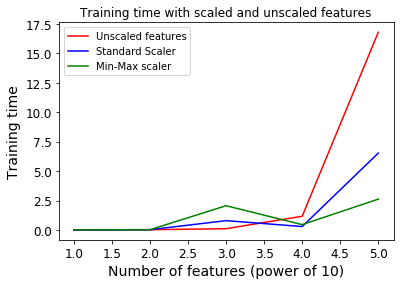

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# We save here the training time for varying number of features.
training_times_min_max_scaling = []

for i in range(1, 6):
    print("Training with {} features".format(10**i))
    X_train, X_test, y_train, y_test = train_test_split(X[:, :10**i], y, test_size=0.2, random_state=42)
    lin_reg = SGDRegressor()
    
    start_time = time.time()
    
    # We create an instance of the class MinMaxScaler
    scaler = MinMaxScaler(feature_range=(-1, 1))
    # We scale the training instances.
    X_train = scaler.fit_transform(X_train)

    # We train the linear regressor
    lin_reg.fit(X_train, y_train)
    training_time = time.time() - start_time
    training_times_min_max_scaling.append(training_time)
    print("Training time --- {} seconds ---\n".format(training_time))

# We plot the training times with unscaled features and using StandardScaler and Min-Max scaler.
plt.plot([1, 2, 3, 4, 5], training_times_unscaled, '-r', label="Unscaled features")
plt.plot([1, 2, 3, 4, 5], training_times_standardized, '-b', label="Standard Scaler")
plt.plot([1, 2, 3, 4, 5], training_times_min_max_scaling, '-g', label="Min-Max scaler")

plt.xlabel('Number of features (power of 10)');
plt.ylabel('Training time')
plt.title('Training time with scaled and unscaled features')
plt.legend()



## Using Pipelines

Scikit-learn provides a powerful object to define a sequence of transformations that is called a **pipeline**. A pipeline is a sequence of operations that is applied on a dataset. 
Each object of a pipeline is a **transformer** that executes a specific transformation (e.g., standardization) on the input data. Optionally, the last object of the pipeline can be an **estimator**, a machine learning algorithm that is applied on the transformed dataset.

In the following cell, we define a pipeline with two objects:

1. An instance of the class **StandardScaler** (a **transformer**).
2. An instance of the class **SGDRegressor** (an **estimator**).

In [ ]:
from sklearn.pipeline import Pipeline

# Each object of the pipeline is identified by a key ('std_scaler', 'linreg').
# You can use any value as the key of an object in the pipeline
pipeline =  Pipeline([
    ('std_scaler', StandardScaler()),
    ('linreg', SGDRegressor())
])

The **advantage** of using a pipeline is that we define  all the transformations once and we can apply them on different datasets, which results in a shorter, more readable code. 
Moreover, when training and testing a model, a pipeline ensures that we apply the **exact same transformations** on both the training and test set.

In the following cell, we obtain a training and test set from the synthetic data and we apply the pipeline on the training set.

<div class="alert alert-block alert-success">
<b>Question 4.</b> What is the effect of calling the function <i>fit</i> on the pipeline?
</div>

In [ ]:
X, y = make_regression(n_samples=1000, n_features=20, noise=10, random_state=2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
pipeline.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('std_scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('linreg',
                 SGDRegressor(alpha=0.0001, average=False, early_stopping=False,
                              epsilon=0.1, eta0=0.01, fit_intercept=True,
                              l1_ratio=0.15, learning_rate='invscaling',
                              loss='squared_loss', max_iter=1000,
                              n_iter_no_change=5, penalty='l2', power_t=0.25,
                              random_state=None, shuffle=True, tol=0.001,
                              validation_fraction=0.1, verbose=0,
                              warm_start=False))],
         verbose=False)

<div class="alert alert-block alert-success">
    
**Solution.** Calling the function *fit* triggers the call of the function *fit_transform()* on all the transformers of the pipeline (in this case, the instance of *StandardScaler*) and the function *fit* on the estimator (in this case, the *SGDRegressor*). In other words, the training data are standardized and a linear regressor is trained on the standardized data.

</div>

<div class="alert alert-block alert-success">
<b>Question 5.</b> Write the code that uses the pipeline to transform the test instances and uses the learned linear regressor to make predictions. Estimate the RMSE.
</div>

<div class="alert alert-block alert-success">
    
**Solution.** The code is given below.

</div>

In [ ]:
# Calling the function predict on X_test will result in calling the function transform
# on each tranformer of the pipeline and the function predict on the estimator.
predictions = pipeline.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print(np.sqrt(mse))

9.904994389283457


<div class="alert alert-block alert-info">
You should always use pipelines when training/testing machine learning algorithms on preprocessed data.
</div>

## Handling missing data

Virtually any real dataset contains some amount of **missing data**, where one or more features have missing values. Generally, machine learning algorithms **don't like** missing values, which is why we need to deal with them before training.


When only a handful of instances present some missing values, we can safely remove them from the dataset. This procedure is called **listwise deletion**. 
However, listwise deletion is a **risky heuristics** that should be used with caution, as it might severely affect the distribution of the features and the regression coefficients.

Let $X$ be the matrix representing a dataset and $X_{j}$ be a feature with missing values (a column of $X$). We can identify three categories of missing data:

1. **Missing completely at random (MCAR).** The probability that a value of $X_j$ is missing does **not** depend on the values of the other features, whether they are missing or not.

$$P(X_j\ missing | X) = P(X_j\ missing)$$

2. **Missing at random (MAR).** The probability that a value of $X_j$ is missing depends on the **observed values** $X_{observed}$ (not the missing values) of the other features.

$$P(X_j\ missing | X) = P(X_j\ missing | X_{observed})$$

3. **Missing not at random (MNAR).** The probability that a value of $X_j$ is missing depends on the **missing values** $X_{missing}$ of the other features (or a missing feature).

$$P(X_j\ missing | X) = P(X_j\ missing | X_{missing})$$

In the following cell, we define three functions *mcar()*, *mar()* and *mnar()* in order to generate some missing values of the three categories respectively in a given dataset. In each function, we specify the index of the feature for which we intend to generate missing values, as well as the ratio of missing values.

In [ ]:
import random
import math

def mcar(X, missing_feature, missing_ratio=0.05):
    '''Generates missing values of category MCAR in the given dataset for the specified feature.
    
    The function randomly picks some values in the column of X with index missing_feature and replaces 
    them with NaN (indicating a missing value). 
    Missing values are selected completely at randon, their choice doesn't depend on the other 
    values of X.
    
    Parameters
    ----------
        X : numpy array (matrix)
            A dataset.
        missing_feature : int
            The index of the column of X where we want to generate some missing values.
        missing_ratio : float
            A value between 0 and 1, specifying the ratio of missing values (over the total number of instances).
        
    Returns
    --------
        Numpy array (matrix).
            The input matrix X with missing values for the specified feature.
    
    '''
    n_instances = X.shape[0]
    X_mcar = X.copy()
    mcar = math.floor(n_instances * missing_ratio)
    idx_mcar = [True]*mcar + [False]*(n_instances - mcar)
    random.shuffle(idx_mcar)
    X_mcar[idx_mcar, missing_feature] = float('nan')
    return X_mcar
    

def find_threshold(Xj, ratio=0.05):
    '''Auxiliary function used by functions mar() and mnar(). 
    
    Determines the threshold value in array Xj 
    such that the number of instances of Xj below that value over the total number of instances
    matches the given ratio.
    
    Parameters
    ----------
        Xj : numpy array.
            A column of a matrix X.
        ratio : float
            The ratio of the instances of Xj that have a value below 
            the determined threshold.
        
    Returns
    -------
        float
            The threshold value.
    
    '''
    Xj_sorted = np.sort(Xj, axis=None)
    return Xj_sorted[math.ceil(Xj_sorted.shape[0] * ratio)]
    

def mar(X, missing_feature, influencing_feature, missing_ratio=0.05):
    '''Generates missing values of category MAR in the given dataset for the specified feature.
    
    The function sets the missing_feature to NaN (indicating a missing value) 
    for all the instances such that the influencing_feature has 
    a value below a certain threshold. 
    
    Missingness of values in themissing_feature 
    depends on the observed values of influencing_feature.
   
    
    The threshold is automatically determined to match the given missing_ratio.
     
    Parameters
    ----------
        X : numpy array (matrix)
            A dataset.
        missing_feature : int
            The index of the column of X where we want to generate some missing values.
        influencing_feature : int
            The index of the column of X that influences the missingness in missing_feature.
        missing_ratio : float
            A value between 0 and 1, specifying the ratio of missing values (over the total number of instances).
        
    Returns
    --------
        Numpy array (matrix).
            The input matrix X with missing values for the specified feature.
    
    '''
    X_mar = X.copy()
    n_instances = X_mar.shape[0]
    n_features = X_mar.shape[1]
    threshold = find_threshold(X_mar[:, influencing_feature], missing_ratio)
    X_mar[X_mar[:, influencing_feature]<=threshold, missing_feature] = float('nan')
    return X_mar

def mnar(X, missing_feature, missing_ratio=0.05):
    '''Generates missing values of category MNAR in the given dataset for the specified feature.
    
    The function sets the missing_feature to NaN (indicating a missing value) 
    for all the instances such that the missing_feature has 
    a value below a certain threshold. 
    
    Missingness of values of missing_feature 
    depends on the missing values of missing_feature.
    For some unknown reason, values below a certain threshold are not recorded.
   
    The threshold is automatically determined to match the given missing_ratio.
     
    Parameters
    ----------
        X : numpy array (matrix)
            A dataset.
        missing_feature : int
            The index of the column of X where we want to generate some missing values.
        missing_ratio : float
            A value between 0 and 1, specifying the ratio of missing values (over the total number of instances).
        
    Returns
    --------
    Numpy array (matrix)
        The input matrix X with missing values for the specified feature.
    
    '''
    X_mnar = X.copy()
    n_instances = X_mnar.shape[0]
    n_features = X_mnar.shape[1]  
    threshold = find_threshold(X_mnar[:, missing_feature], missing_ratio)
    X_mnar[X_mnar[:, missing_feature]<=threshold, missing_feature] = float('nan')
    return X_mnar

We want to assess the effect of missing data on a regression problem. In particular, we want to see how predictions on a test set are influenced when missing data occur in the training set.

Let's first define a convenience function *generate_dataset()* that creates a dataset with the function *make_regression()*, split it into a training and test set and creates four versions of the training set: one with complete data, the others with missing data of each category.

In [ ]:
NO_MISSING = "NO_MISSING"
MCAR = "MCAR"
MAR = "MAR"
MNAR = "MNAR"

def generate_dataset(n_samples=1000, n_features=10, noise=20, missing_feature=1, \
                     influencing_feature=2, missing_ratio=0.05):
    
    '''Generates a new regression problem (with and without missing values).
    
    The function generates a dataset, split it into a training (80% of the instances) 
    and test set  and returns four versions
    of the training set: one with no missing values, the other with missing values, one for each category 
    (MCAR, MAR and MNAR).
    
    Parameters
    ----------
        n_samples : int
            Number of instances in the dataset (default: 1000).
        n_features : int
            Number of features in the dataset (default: 10)
        noise : int
            The standard deviation of the noise added to the generated instances (default: 20)
        missing_feature : int
            The index of the feature that will contain the missing values (default: 1).
        influencing_feature : int
            The index of the feature that determines the missingness in the missing_feature (default:2).
            This is used to generate MAR missing values.
        missing_ratio: float
            The ratio (values between 0 and 1) 
            of missing values over the total number of instances (default: 0.05).
    
    Returns
    -------
        A tuple (training_sets, X_test, y_test)
            - The first item of the tuple (training_sets) is a Python dictionary with four elements.
                training_set[key] (with key having values "NO_MISSING", "MCAR", "MAR", "MNAR") 
                is a tuple (X_train, y_train), representing a training set.
            - The second item of the tuple is X_test.
            - The third item of the tuple is y_test.
        
    '''
    
    X, y = make_regression(n_samples=n_samples, n_features=n_features, noise=noise)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    training_sets = {}
    
    # Generates the training sets with missing data, one for each category of missing data.
    X_train_mcar = mcar(X_train, missing_feature, missing_ratio=missing_ratio)
    X_train_mar = mar(X_train, missing_feature, influencing_feature, missing_ratio=missing_ratio)
    X_train_mnar = mnar(X_train, missing_feature, missing_ratio=missing_ratio)
    
    training_sets[NO_MISSING] = (X_train, y_train)
    training_sets[MCAR] = (X_train_mcar, y_train)
    training_sets[MAR] = (X_train_mar, y_train)
    training_sets[MNAR] = (X_train_mnar, y_train)
    
    return (training_sets, X_test, y_test)

Several strategies exist to handle missing values. We now apply them on the synthetic datasets to see how they behave.

### Listwise deletion

Perhaps the easiest way to handle missing data is to...ignore them! In other words, we simply drop from the training set the instances that have missing values. This strategy is called **listwise deletion**. 

We first define a function *dropnan()* that drops the instances with missing values from a dataset.

In [ ]:
def dropnan(X, y, missing_feature):
    '''Drops the instances that have a missing value for the given feature.
    
    The input dataset (X, y) is not modified. A new dataset is created and returned.
    
    Parameters
    ----------
        X : numpy array (matrix).
            A dataset. Each row corresponds to an instance, each column to a feature.
        y : numpy array.
            The vector with the target values for each instance.
        missing_feature : int
            The index of the column of X that corresponds to the feature with missing values.
    
    Returns
    -------
        A tuple.
            A tuple (X_nomissing, y_nomissing) that corresponds to the input dataset (X, y) without the instances
            with missing values.
    '''
    X_nomissing = X.copy()
    y_nomissing = y.copy()
    y_nomissing = np.delete(y_nomissing, np.argwhere(np.isnan(X_nomissing[:, missing_feature])), axis=0)
    X_nomissing = X_nomissing[~np.isnan(X_nomissing).any(axis=1)]
    return (X_nomissing, y_nomissing)

Then we write a function *listwise_deletion()* that takes in the training sets returned by the function *generate_dataset()* and uses the function *dropnan()* to remove the instances with missing values.

In [ ]:
def listwise_deletion(training_sets, missing_feature):
    '''Removes the instances with missing values in the specified missing_feature from the given 
    training sets.
    
    Parameters
    ----------
        training_sets : dictionary.
            The training sets returned by the function generate_dataset()
        missing_feature : int
            The index of the feature with missing values.
    
    Returns
    -------
        Dictionary.
            The input training sets without the instances with missing values.
    '''
    training_sets_listwise = {}
    for key, value in training_sets.items():
        training_sets_listwise[key] = dropnan(value[0], value[1], missing_feature)
    return training_sets_listwise

Then we define a function *test_linear_regression()* that trains a linear regression model on the training sets and returns the prediction errors on the test set.

In [ ]:
def test_linear_regression_models(training_sets, X_test, y_test):
    
    ''' Trains linear regression models on the given training sets and returns the prediction errors on the 
    given test set.
    
    Parameters
    ----------
        training_sets : A dictionary.
            The training sets. Each item of the dictionary is of the form (key, training_set), where
            training_set is a tuple (X_train, y_train).
        X_test : Numpy array (matrix).
            The features of the test set.
        y_test : Numpy array (vector).
            The target values of the test set.
            
    Returns
    -------
        A dictionary.
            The predictions errors on the test set of the trained models.
            Each item of the dictionary is of the form (key, error), where key is one of the 
            keys of the input dictionary training_sets and error is the prediction error (RMSE)
            of the model on the test set.
          
    '''
    
    prediction_errors = {}

    for key, value in training_sets.items():
        linreg = SGDRegressor()
        linreg.fit(value[0], value[1])
        predictions = linreg.predict(X_test)
        prediction_errors[key] = mean_squared_error(y_test, predictions)

    return prediction_errors

Finally, we write a function *test_listwise_deletion()* that:

1. Generates a certain number of regression problems with missing values (MCAR, MAR and MNAR) by using the function *generate_dataset()*, 

2. Applies listwise deletion on each training set and evaluates the prediction errors on the test set. 

3. The predictions errors are then averaged over the number of regression problems. If the number of regression problems is high (e.g., 10000), we can get a good estimate of the prediction errors in the different cases.

In [ ]:
def test_listwise_deletion(n_datasets=10000, n_samples=1000, n_features=10, noise=20, \
                           missing_feature=1, influencing_feature=2, missing_ratio=0.05):
    
    '''Generates n_datasets with n_samples with complete and missing data for each category (MCAR, MAR, MNAR).
    For each dataset, compute the prediction error of a linear regression model trained on the training sets with
    complete and missing data (after listwise deletion). Print the prediction error averaged over the number of 
    datasets.
    
    Parameters
    ----------
        n_datasets : int
            The number of generated datasets (default: 10000).
        n_samples : int
            The number of instances in each dataset (default: 1000).
        n_features : int
            The number of features in each dataset (default: 10).
        noise : int
            The standard deviation of the noise added to the generated instances.
        missing_feature : int
            The index of the feature that will contain missing data.
        influencing_feature : int
            The index of the feature that determines the missingness in the missing_feature (default:2).
            This is used to generate MAR missing values.
        missing_ratio: float
            The ratio (values between 0 and 1) 
            of missing values over the total number of instances (default: 0.05).      
        
    '''
    
    # The prediction errors averaged over the generated datasets.
    average_prediction_errors = {}
    
    progress = 0
    
    # Display a progress bar
    print_progress_bar(progress, int(n_datasets/100), prefix = 'Progress:', suffix = 'Complete', length = 50)
    
    # Sample n_datasets
    for i in range(n_datasets):
        
        # Generate a dataset with training sets with complete and missing values.
        training_sets, X_test, y_test = generate_dataset(n_samples=n_samples, n_features=n_features, noise=noise, \
                                                         missing_feature=missing_feature, influencing_feature=influencing_feature, \
                                                         missing_ratio=missing_ratio)
        
        # Remove the instances with missing values from the training sets.
        training_sets = listwise_deletion(training_sets, missing_feature)
        
        # Test the prediction errors of the regression models trained on the training sets.
        prediction_errors = test_linear_regression_models(training_sets, X_test, y_test)
        
        # Update the count of prediction errors in order to compute the average.
        for key, value in prediction_errors.items():
            if key not in average_prediction_errors :
                average_prediction_errors[key] = value
            else:
                average_prediction_errors[key] += value 
                
        # Update the progress bar
        if i % int(n_datasets/100) == 0:
            progress += 1
            print_progress_bar(progress, int(n_datasets/100), prefix = 'Progress:', suffix = 'Complete', length = 50)
    
    # Compute the average of the prediction errors.
    for key in average_prediction_errors.keys():
        average_prediction_errors[key] /= n_datasets
    
    print("\nPrediction error with no missing data {}".format(average_prediction_errors[NO_MISSING]))
    print("Prediction error with MCAR DATA {}".format(average_prediction_errors[MCAR]))
    print("Prediction error with MAR DATA {}".format(average_prediction_errors[MAR]))
    print("Prediction error with MNAR DATA {}".format(average_prediction_errors[MNAR]))

<div class="alert alert-block alert-success">
<b>Question 6.</b> Run the following cell that calls the function <i>test_listwise_deletion()</i> with <i>n_samples</i> = 1000 and <i>missing_ratio</i> = 0.7 (70% of the training instances will have a missing value). What can you say about the prediction errors in the different cases?

1. Call the function <i>test_listwise_deletion()</i> with <i>n_samples</i> = 1000 and <i>missing_ratio</i> = 0.2. Comment on the prediction errors in the different cases.

2. Call the function <i>test_listwise_deletion()</i> with <i>n_samples</i> = 5000 and <i>missing_ratio</i> = 0.7. Comment on the prediction errors in the different cases.
    
</div>

In [ ]:
test_listwise_deletion(n_samples=1000, missing_ratio=0.7, noise=20)

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Prediction error with no missing data 405.7115465756454
Prediction error with MCAR DATA 419.3734681326314
Prediction error with MAR DATA 436.0530442016202
Prediction error with MNAR DATA 435.98544877306875


<div class="alert alert-block alert-success">
    
**Solution.** 

With *n_samples* = 1000 and *missing_ratio* = 0.7, the **prediction error** is **much lower** when we use a training set with **complete data** than missing data. We observe that the **prediction error** with **MCAR missing** data is **much lower** than the one obtained with MAR and MNAR missing data. This experiment shows that when the missing ratio is high (with a missing ratio of 0.7, listwise deletion only leaves 300 instances in the training set), **ignoring missing values is not a good strategy**, especially if missing data is not MCAR (in practice, it is reasonable to assume a MAR missingness). 

<div class="alert alert-block alert-info">
Although the absolute difference in the prediction errors seems to be small, that is due to the fact that we generated regression problems with <i>noise</i> = 20. If we set a higher value of <i>noise</i>, the absolute difference between the complete case and MCAR will be much higher. </div>


1. With *n_samples* = 1000 and *missing_ratio* = 0.2, the **prediction error** is still **lower** when we use a training set with no missing data. However, the prediction errors obtained with training sets with missing data is not much higher. This is normal, as only 20% of the instances have missing values. 

<div class="alert alert-block alert-info">
Again, try with a higher value of <i>noise</i>; you'll see that the absolute difference in the prediction errors will be much higher. Even if the missing ratio seems to be low, we might have a noticeable impact on the prediction 
error.
</div>


2. With *n_samples* = 5000 and *missing_ratio* = 0.7, we have the **same missing ratio** as in the first case, but the dataset contains **many more instances**. As a result, the differences in the prediction errors are much smaller than in the first case (the training sets after listwise deletion still contain 1500 instances).

<div class="alert alert-block alert-info">
In this simulation, we assumed that only one feature has missing values, while the other features are complete. The reality might be a bit more complex than that.
</div>

<div class="alert alert-block alert-danger">
<b>Warning:</b> In this simulation, we can measure the difference between the prediction error obtained with a complete training set and with missing values. In real datasets, this difference will be unknown. In general, it <a href="https://stefvanbuuren.name/fimd/sec-simplesolutions.html" target="_blank">would be wrong to justify the use of listwise deletion based on the missing ratio</a>. Listwise deletion is only acceptable if a tiny fraction of instances have missing values. Take home concept: <b>think twice before removing instances from the training set</b>.

</div>

</div>


### Univariate feature imputation

A better alternative to listwise deletion is the **imputation** of missing values; that is, missing values are determined (or, **imputed**) by using the observed values in the dataset.

One way to impute the missing values of the $i$-th feature is to use the observed values of the $i$-th feature itself; this is called **univariate simple imputation**.

<div class="alert alert-block alert-info">
Sklearn provides class <a href="https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html" target="_blank">sklearn.impute.SimpleImputer</a> for univariate feature imputation.
</div>

Different **imputation strategies** exist. One possibility is to replace the missing values of the $i$-th feature with the **mean** of the observed values of the $i$-th feature; other strategies use the **median**, the **most frequent value** or a **constant value**. While the first two can only be used for numeric values, the latter can be used with categorical values too. 

The code in the following cell:

1. Generates a regression problem with 1000 instances and 10 features. 

2. Generates some missing data (MCAR) in the feature with index 1 (*missing ratio* = 0.7). 

3. Prints mean and standard deviation of the observed values of feature 1.

4. Prints the Pearson correlation coefficient between the feature 1 and the target variable y.

<div class="alert alert-block alert-info">

Pearson’s correlation coefficient $r$ is a statistical measure of the strength of a linear relationship between two features $X$ and $Y$. It is defined by the following formula:

$$r_{X, Y} = \frac{cov(X, Y)}{\sigma_X \sigma_Y}$$

where:

* $cov(X, Y)$ is the **covariance**.
* $\sigma_X$ is the **standard deviation** of $X$.
* $\sigma_Y$ is the **standard deviation** of $Y$.

By definition, $-1 \leq r \leq 1$.

* Positive values denote positive linear correlation.

* Negative values denote negative linear correlation.

* A value of 0 denotes no linear correlation.

* The stronger the value is to 1 or -1, the stronger the linear correlation.

**Caution.** The existence of a strong correlation between $X$ and $Y$ **does not imply** a causal link between the features.

We can describe the strength of the correlation using the guide suggested by Evans in his book *Straightforward statistics for the behavioral sciences* (1996):

* $0 \leq |r| \leq 0.19$: very weak correlation.

* $0.2 \leq |r| \leq 0.39$: weak correlation.

* $0.4 \leq |r| \leq 0.59$: moderate correlation.

* $0.6 \leq |r| \leq 0.79$: strong correlation.

* $0.8 \leq |r| \leq 1$: very strong correlation.


**Source**: https://www.statstutor.ac.uk/resources/uploaded/pearsons.pdf

</div>

<div class="alert alert-block alert-success">
<b>Question 7.</b> 
Compare mean, standard deviation, the correlation coefficients and the histograms of the observed and imputed values.
</div>

Mean (observed values): -0.006745680645429331
Standard deviation (observed values): 0.9945674511943117
Pearson correlation coefficient (observed values): 0.17992095820741189


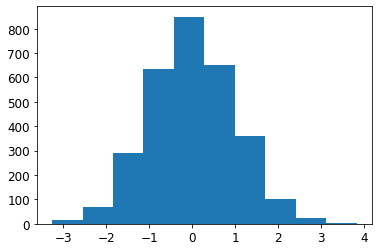

Mean (imputed values): -0.0067456806454293345
Standard deviation (imputed values): 0.5447470279795428
Pearson correlation coefficient (imputed values): 0.10046187286057989


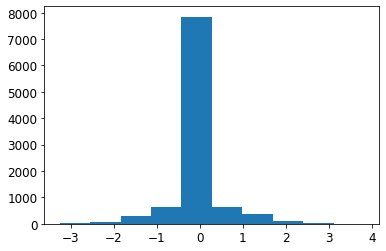

In [ ]:
from sklearn.impute import SimpleImputer
from scipy.stats.stats import pearsonr  

# Generate a dataset.
X, y = make_regression(n_samples=10000, n_features=10, noise=20)

# Generate some missing values in feature 1.
X = mcar(X, 1, missing_ratio=0.7)

# We drop the instances with missing values in feature 1.
# This way, we can compute some statistics on the observed values only.
X_nomissing, y_nomissing = dropnan(X, y, 1)

# Compute the Pearson correlation coefficient between the values of feature 1 and 
# the target variable y. The function pearsonr returns  the correlation coefficient
# itself and the p_value, indicating the statistical significance of the correlation.
correlation_coefficient, pvalue = pearsonr(X_nomissing[:, 1], y_nomissing)

# Print mean, standard deviation and correlation coefficient on the observed values.
print("Mean (observed values): {}".format(np.mean(X_nomissing[:, 1])))
print("Standard deviation (observed values): {}".format(np.std(X_nomissing[:, 1])))
print("Pearson correlation coefficient (observed values): {}".format(correlation_coefficient))

# Show the histogram of the values of feature 1.
plt.hist(X_nomissing[:, 1])
plt.show()

# Instantiate a transformer for mean imputation.
imp_mean = SimpleImputer(strategy='mean')

# Transforms X so that the missing values are determined by mean imputation.
# The "fit" part is used to compute the mean of the values in X[:, 1]
X_mean = imp_mean.fit_transform(X)

correlation_coefficient, p_value = pearsonr(X_mean[:, 1], y)

print("Mean (imputed values): {}".format(np.mean(X_mean[:, 1])))
print("Standard deviation (imputed values): {}".format(np.std(X_mean[:, 1])))
print("Pearson correlation coefficient (imputed values): {}".format(correlation_coefficient))

plt.hist(X_mean[:, 1])
plt.show()

<div class="alert alert-block alert-success">

**Solution.** The distribution of the values of the feature clearly changes.
The standard deviation is clearly underestimated. 
This happens with any value of missing_ratio and any category 
of missing values (try with MAR and MNAR).

The correlation coefficient of the imputed values is clearly lower than the correlation in the observed values.

If we lower missing_ratio, we see that the effect of mean imputation on
the different metrics is milder. Mean imputation should only be used 
when a handful of missing values exist for a certain feature.



</div>

An object of the class *SimpleImputer* is a transformer and, as such, can be used in a pipeline. The example in the following cell creates a pipeline that replaces the missing values with the mean, standardizes the values and then applies a linear regressor.
The pipeline is used on the training and test set of a generated dataset.

<div class="alert alert-block alert-success">

Read the code below. You'll use the same schema (creation of a pipeline, call of the function $fit$ on the pipeline with the training data, call of the function $predict$ on the pipeline with test data) whenever you'll need to train and evaluate a machine learning model.

</div>

In [ ]:
# Creates the pipeline.
pipeline =  Pipeline([
    ('mean_imputer', SimpleImputer(strategy='mean')),
    ('std_scaler', StandardScaler()),
    ('linreg', SGDRegressor())
])

# Generate a dataset.
X, y = make_regression(n_samples=10000, n_features=10, noise=10)

# Obtain a training and test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Generate some missing values in the training set.
X_train = mcar(X_train, 1, missing_ratio=0.2)

# Train the linear regression model by using the pipeline.
pipeline.fit(X_train, y_train)

# Make predictions on the test set.
predictions = pipeline.predict(X_test)
mse = mean_squared_error(y_test, predictions)

# Compute the prediction error.
print("Prediction error: {}".format(np.sqrt(mse)))

Prediction error: 10.122370348724889


### Multivariate feature imputation

**Multivariate feature imputation** consists in estimating the missing values of a feature by using the observed values of all the features. 

<div class="alert alert-block alert-info">
Sklearn provides class <a href="https://scikit-learn.org/stable/modules/generated/sklearn.impute.IterativeImputer.html#sklearn.impute.IterativeImputer" target="_blank">sklearn.impute.IterativeImputer</a> for multivariate feature imputation.
This imputer is, however, still in the <b>experimental phase</b>.
</div>

The Sklearn implementation works in an iterative way. At each step, a feature with missing values is selected as a target variable $y$ and a regressor is trained on $(X, y)$ for known values of $y$; the trained regressor is then used to predict the missing values of $y$. After predicting the value of all features with missing values, the same procedure is repeated for $max\_iter$ rounds.

In the following cell, we generate a dataset with 10,000 samples, **1 explanatory feature** ($X$ is a 10,000 $\times$ 1 vector) and **1 dependent variable** ($y$ is a 10,000 $\times$ 1 vector).
We then generate some missing values in the explanatory feature and we impute the values with **regression imputation** imputation by using the class *IterativeImputer*. 


<div class="alert alert-block alert-success">
<b>Question 8.</b> The code in the following cell generates a plot with the observed values of the explanatory feature in blue and the imputed values in red. What do you notice?
</div>


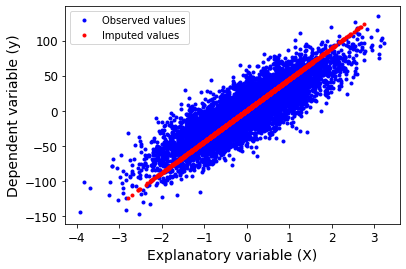

In [ ]:
from sklearn.experimental import enable_iterative_imputer  # noqa
from sklearn.impute import IterativeImputer


X, y = make_regression(n_samples=10000, n_features=1, noise=20, random_state=42)
X = mcar(X, 0, missing_ratio=0.3)
missing_idx = np.isnan(X[:, 0])
 
it_imp = IterativeImputer()
X_it_imp = it_imp.fit_transform(np.append(X, np.reshape(y, (-1, 1)), axis=1))
plt.plot(X_it_imp[~missing_idx, 0], y[~missing_idx], '.', color='b', label="Observed values")
plt.plot(X_it_imp[missing_idx, 0], y[missing_idx], '.', color='r', label="Imputed values")
plt.xlabel('Explanatory variable (X)');
plt.ylabel('Dependent variable (y)')


plt.legend()

<div class="alert alert-block alert-success">

**Solution.** The imputed values are obtained by regression on $(X, y)$. This is why they form a straight line. This kind of imputation should be avoided because it artificially strengthens the relations in the data.

</div>

The code in the following cell is exactly the same as in the previous cell, except that we pass a parameter $sample\_posterior=True$. This means that the imputed values are obtained by applying linear regression and artificially adding  some Gaussian noise. This technique is known as **stochastic regression imputation**.

<div class="alert alert-block alert-success">
<b>Question 9.</b> How does the plot change with respect with the plot in the previous question?
</div>

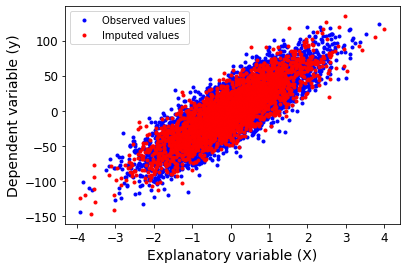

In [ ]:
X, y = make_regression(n_samples=10000, n_features=1, noise=20, random_state=42)
X = mcar(X, 0, missing_ratio=0.3)
missing_idx = np.isnan(X[:, 0])
 
it_imp = IterativeImputer(sample_posterior=True)
X_it_imp = it_imp.fit_transform(np.append(X, np.reshape(y, (-1, 1)), axis=1))
plt.plot(X_it_imp[~missing_idx, 0], y[~missing_idx], '.', color='b', label="Observed values")
plt.plot(X_it_imp[missing_idx, 0], y[missing_idx], '.', color='r', label="Imputed values")
plt.xlabel('Explanatory variable (X)');
plt.ylabel('Dependent variable (y)')


plt.legend()

<div class="alert alert-block alert-success">

**Solution.** Since some noise is added to the imputed values after regression, the imputed values are not on a straight line anymore and seem to be distributed in a similar way as the observed values. This example shows that stochastic regression imputation is a far better way to impute missing values than simple regression.

</div>

In the following cell we define a function $test\_imputation$ that executes the same operations as the function $test\_listwise\_deletion$ (generation of different datasets to test a linear regression model under different missing values conditions) while using the univariate and multivariate imputation strategies that we've seen in this section. 
With respect to $test\_listwise\_deletion$, this function takes in two more parameters:

* mode. The value of this parameter is either "univariate" or "multivariate".

* strategy. If mode="univariate", the value of this parameter is one of the following: "mean", "median", "most_frequent", "constant". If mode="multivariate", the value of this parameter is either "regression" or "stochastic".

In [ ]:
def test_imputation(n_datasets=10000, n_samples=1000, n_features=10, noise=20, \
                           missing_feature=1, influencing_feature=2, missing_ratio=0.05, 
                           mode = 'univariate', strategy='mean'):
    
    '''This function is used to test missing value imputation with either univariate or multivariate imputation.
    The function generates n_datasets with n_samples with complete and missing data for each category (MCAR, MAR, MNAR).
    For each dataset, it computes the prediction error of a linear regression model trained on the training sets with
    complete and missing data (after listwise deletion). Print the prediction error averaged over the number of 
    datasets.
    
    Parameters
    ----------
        n_datasets : int
            The number of generated datasers (default: 10000).
        n_samples : int
            The number of instances in each dataset (default: 1000).
        n_features : int
            The number of features in each dataset (default: 10).
        noise : int
            The standard deviation of the noise added to the generated instances.
        missing_feature : int
            The index of the feature that will contain missing data.
        influencing_feature : int
            The index of the feature that determines the missingness in the missing_feature (default:2).
            This is used to generate MAR missing values.
        missing_ratio: float
            The ratio (values between 0 and 1) 
            of missing values over the total number of instances (default: 0.05).
        mode : string
            Univariate or multivariate.
        strategy: string
            If mode="univariate", strategy can take any of the following values: "mean", "median", "most_frequent", 
            "constant".
            If mode="multivariate", strategy can take any of the following values: "regression", "stochastic".
        
    '''
    
    # The prediction errors averaged over the generated datasets.
    average_prediction_errors = {}
    
    progress = 0
    
    print_progress_bar(progress, int(n_datasets/100), prefix = 'Progress:', suffix = 'Complete', length = 50)
    
    # Sample n_datasets
    for i in range(n_datasets):
        
        # Generate a dataset with training sets with complete and misssing values.
        training_sets, X_test, y_test = generate_dataset(n_samples=n_samples, n_features=n_features, noise=noise, \
                                                         missing_feature=missing_feature, influencing_feature=influencing_feature, \
                                                         missing_ratio=missing_ratio)

        # We impute the missing values with the selected strategy
        if mode == "multivariate":
            for key, value in training_sets.items():
                it_imp = IterativeImputer(sample_posterior=(strategy=="stochastic"))
                X_train = it_imp.fit_transform(np.append(value[0], np.reshape(value[1], (-1, 1)), axis=1))
                X_train = np.delete(X_train, -1, axis=1)
                training_sets[key] = (X_train, value[1])
        else:
            for key, value in training_sets.items():
                imp = SimpleImputer(strategy=strategy)
                training_sets[key] = (imp.fit_transform(value[0]), value[1])
            
        # Test the prediction errors of the regression models trained on the training sets.
        prediction_errors = test_linear_regression_models(training_sets, X_test, y_test)
        
        # Update the count of prediction errors in order to compute the average.
        for key, value in prediction_errors.items():
            if key not in average_prediction_errors :
                average_prediction_errors[key] = value
            else:
                average_prediction_errors[key] += value 
                
        # Update the progress bar
        if i % int(n_datasets/100) == 0:
            progress += 1
            print_progress_bar(progress, int(n_datasets/100), prefix = 'Progress:', suffix = 'Complete', length = 50)
    
    # Compute the average of the prediction errors.
    for key in average_prediction_errors.keys():
        average_prediction_errors[key] /= n_datasets
    
    print("\nPrediction error with no missing data {}".format(average_prediction_errors[NO_MISSING]))
    print("Prediction error with MCAR DATA {}".format(average_prediction_errors[MCAR]))
    print("Prediction error with MAR DATA {}".format(average_prediction_errors[MAR]))
    print("Prediction error with MNAR DATA {}".format(average_prediction_errors[MNAR]))


<div class="alert alert-block alert-success">

**Question 10.** Execute the four following cells in order get the average prediction error of a linear regressor trained on 10,000 different datasets by applying respectively:

1. Listwise deletion (as we did before).

2. Mean imputation.

3. Regression imputation.

4. Stochastic regression imputation.

What can you say about the prediction errors in the different scenarios?

</div>

In [ ]:
# Tests listwise deletion (same as before).
test_listwise_deletion(missing_ratio=0.7)

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Prediction error with no missing data 405.7539840897432
Prediction error with MCAR DATA 419.65351851516357
Prediction error with MAR DATA 435.6453227118657
Prediction error with MNAR DATA 436.0875563078833


In [ ]:
# Test mean imputation.
test_imputation(missing_ratio=0.7)

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Prediction error with no missing data 404.73340168703703
Prediction error with MCAR DATA 443.2593401003942
Prediction error with MAR DATA 443.8036035144263
Prediction error with MNAR DATA 3613.8517448462544


In [ ]:
# Test multivariate regression imputation.
test_imputation(missing_ratio=0.7, mode="multivariate", strategy="regression")

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Prediction error with no missing data 405.6652119803672
Prediction error with MCAR DATA 467.5441090170348
Prediction error with MAR DATA 481.3914736812435
Prediction error with MNAR DATA 2180.9609764742154


<div class="alert alert-block alert-warning">
Running the following cell will take much longer than the previous ones.
</div>

In [ ]:
# Test multivariate stochastic regression imputation.
test_imputation(missing_ratio=0.7, mode="multivariate", strategy="stochastic")

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Prediction error with no missing data 405.8498851433009
Prediction error with MCAR DATA 419.80422359416633
Prediction error with MAR DATA 429.9705526751611
Prediction error with MNAR DATA 1214.8852487479896


<div class="alert alert-block alert-success">

**Solution.** 

1. Mean imputation is slightly worse than listwise deletion. Imputing the mean seems to be worse than dropping all the instances with missing values. This is especially true for MNAR data.

2. Regression imputation is worse than mean imputation. This is consistent with what is said about regression imputation: a dangerous method, that artificially strengthens the relations in the data.

3. Stochastic regression imputation is definitely the best choice, especially for MAR data. Indeed, for MAR data this method yields a better prediction error than listwise deletion. 

4. Prediction errors are high for MNAR data with all strategies, except listwise deletion. This confirms that MNAR data are particularly difficult to handle.

</div>